In [1]:
import random
from typing import List
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 2 Create your test internet

In [2]:
#/ start function zero_matrix()

def zero_matrix(a: int) -> List[list]:
    """A function for creating a new zero filed matrix of a x a, a is the parameter"""
    
    matrix = []
    for i in range(a):        ## a is here the number of rows
        row = []               
        for j in range(a):    ## filling a row with a elements (so a is here the number of colomb per row)
            row.append(0)
        matrix.append(row)
        
    return matrix
#/ close function zero_matrix()

In [3]:
#/ start function ref(A,i)

def ref(A: List[list], i: int) -> List[list]:
    """A is matrix, i is row number. The function checks if point A[x][i] is not 1 or A[i][i] (which are standard 0),
    if so, than it runs again for a new random genereted x, if not, it turns A[x][i] into 1."""
   
    m = len(A)                         ##Number of rows in A, nessecary for generating x
    x = i                              ##To start the while loop x is starts as i
    while A[x][i] == 1 or x == i:
        x = int (m * random.random())  ##Generating x  
    A[x][i] = 1                        ##When found a propper x, giving A[x][i] the value 1
    
    return A

#/ close function ref(A,i)

In [4]:
#/ start function all_ref(A,n)

def all_ref(A: List[list], n: int) -> List[list]:
    """A is the given matrix, n is the max number of references. A function for giving every site a number of links, 
    with a maximum of n, in the colombs. So the first colomb show the links given from site 1. The first row shows
    the links given to site 1. So if A[1][2] is 1, (second row, tird colomb) the tird site links to site 2"""
    m = len(A)                                  ##number of rows in A for the for loop.
    for i in range(m):
        p = min(n,1 + int( n * random.random()))##random number of references, with minimum 1, maximum n, for site i
        for j in range(p):
            ref(A, i)                           ##filling colomb i with the random number of refernces
    return A

#/ close function all_ref(A,n)

In [5]:
#/ start function internet(a,links)

def internet(a: int, links: int) -> List[list]:
    """a is the number of sites in the internet, links is the maximum number of links per site. A funciton for creating
    a site with a sites in it. Every site links to maximum links links. """
    
    A = zero_matrix(a)     ##creating a blanck matrix of the form a x a
    all_ref(A, links)   ##filling the matrix with links
    return A
                                         
#/ close function internet(a,links)
B = internet(20,6)
B

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,

# 3 Page rank by random walk

> Next section goes on on B, generated in section 2. This because than it's easier to see the differences in differnt probability weights.

In [6]:
#/ start function links_of_site(i,A)

def links_of_site(i: int, A: List[list]) -> List[int]:
    """i is the number of the site from 0 to m-1. A is the internet of sites. 
    A function wich returns a list of links of site i."""
    m = len(A)                ##number of rows in A 
    links = []                ##creating list for numbering the links of site i
    for j in range(m):
        if A[j][i] ==1:       ##if site i links to site j, than the number j comes in the list links
            links.append(j)
    return links

#/ close function links_of_site(i,A)

In [7]:
#/ start function random_link(i,A)

def random_link(i: int,A: List[list]) -> int:
    """A function wich returns a random item of the list of links from site i in internet A"""
    return random.choice(links_of_site(i,A))

#/ close function random_link(i,A)

In [8]:
#/ start function random_site(A)

def random_site(A: List[list]) -> int:
    """A function wich returns a rondom site of internet A"""
    return random.randrange(len(A))

#/ close function random_site(A)

In [9]:
#/ start function probability(A,i,p)

def probability(A: List[list], i: int, p: float) -> int:
    """A function for making a step to another site, with probability p to a site in the link list of site i, 
    with probability 1-p to a random site of internet A""" 
    if random.random() <= p:      ##if the random number is smaller or equal at the probability, so 1-p goes to else
        k = random_link(i,A)
    else:
        k = random_site(A)
    return k

#/ close function probability(A,i,p)

In [10]:
#/ start function steps_between_sites(A, steps, p)

def steps_between_sites(A: List[list], steps: int, p: float) -> List[int]:
    """A function for keeping track of how manny times there is bin on a sertain site with steps number of steps."""
    site = random.randrange(len(A))      ##initial site is randomly generated
    
    counter = []                         ##counter gets the desired length, wich is the number of sites of internet A
    for i in range(len(A)):
        counter.append(0)
        
    for i in range(steps):               ##for every step the counter gets one more on the steps place
        site = probability(A, site, p)
        counter[site] = counter[site] + 1
        
    return counter

#/ close function steps_between_sites(A, steps, p)

<Container object of 20 artists>
<Container object of 20 artists>
<Container object of 20 artists>
<Container object of 20 artists>


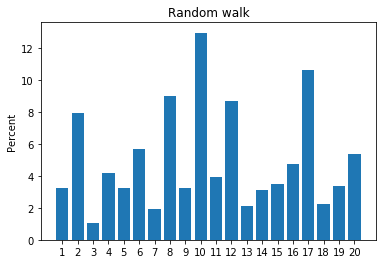

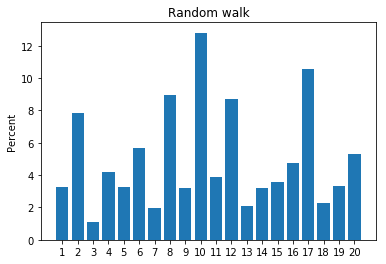

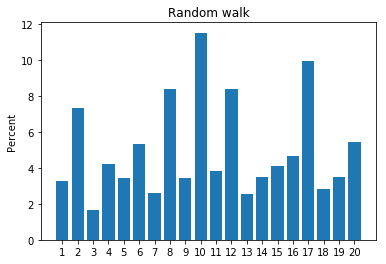

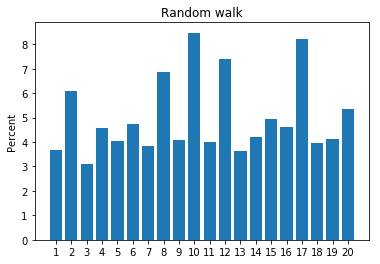

In [11]:
#/ start function plot_bar(A, steps, p)

def plot_bar(A: List[list], steps: int, p: float) -> plt.bar:
    """A function for making a bar plot for percentages of being on a sertain site of the internet. Whit a random
    walk"""
    y = steps_between_sites(A, steps, p) ##initial counter (not in percentages)
    x = []                              ##x-axis (not filled yet)
    for i in range(len(A)):
        y[i] = y[i] / steps*100         ##y-axis now in percentages
        x.append(i+1)                   ##x-axis now filled
    fig,ax = plt.subplots()             ##for loading axes labels

    ax.set_xticks(x)                     
    ax.set_xticklabels(x)               ## labling the x-axis
    ax.set_ylabel('Percent')            ## labling the y-axis
    ax.set_title('Random walk')         ## titleing the bar plot
    
    return plt.bar(x,y)

#/ close function plot_bar(A, steps, p)
print(plot_bar(B, 1000000, 1.00))         ##with probability 0.99
print(plot_bar(B, 1000000, 0.99))         ##with probability 0.99
print(plot_bar(B, 1000000, 0.85))         ##with probability 0.85
print(plot_bar(B, 1000000, 0.50))         ##with probability 0.50

Kunnen jullie proberen te verklaren waarom de grafiekjes er zo ongeveer (je hebt natuurlijk te maken met een willekeur elke keer als het programma de functies runt)uitzien en waarom ze hetzelfde blijven alleen dat de verschillen kleiner worden naarmate de probability kleiner wordt?
Houd er even rekening mee met je woorden dat elke keer dat je het programma runt er een andere matrix komt en dus andere plots zijn. 


# 4 PageRank due to a matrix eigenvalue problem

Weet iemand een efficientere manier om dit uit te rekenen? Denk er even over na, de volgorde bv waarin we de calculaties uitvoeren. En hoe de verhouding is van de grootte van de matrix en lineaire-algebra calculaties. Mag ook louter theoretisch zonder er een code omheen geschreven te hebben. Ze geven aan dat voor de echt google PageRank de orginele matrix millioenen groot is en gemiddeld maar iets van 7 links per colom hebben. 

In [12]:
#/ start function square_matrix_multiplication(X,Y)

def square_matrix_multiplication(X: List[list], Y: List[list]) -> List[list]:
    """A function for the multiplication of two square matrixes X * Y"""
    result = zero_matrix(len(X))                   ## a plain matrix only containing zeros 
    for i in range(len(X)):                        ## iterate through rows of X
        for j in range(len(Y[0])):                 ## iterate through columns of Y
            for k in range(len(Y)):                ## iterate through rows of Y
                result[i][j] += X[i][k] * Y[k][j]  ## giving the multiplicated values to result
    return result

#/ close function square_matrix_multiplication(X,Y)

In [13]:
#/ start function chance_matrix(A,p)

def chance_matrix(A: List[list], p: float) -> List[list]:
    """A function for converting matrix A to a matrix that characterizes the chances
    to go from a certain page to another in the Google algorithm."""
    B = zero_matrix(len(A))                               ## a plain matrix only containing zeros 
    for i in range(len(A)):                               ## iterate through rows of X
        for j in range(len(A[0])):                        ## iterate through columns of X 
            c = len(links_of_site(j, A))                  ## c is the column sum
            if A[i][j] == 0:
                B[i][j] = (1-p)/(len(A))                  ## giving the chance values to the plain spots in the matrix
            else:
                B[i][j] = (p*A[i][j])/c + (1-p)/(len(A))    ## giving the chance values to the ones spots in the matrix
    return B

#/ start function chance_matrix(A,p)

In [14]:
#/ start function a_to_the_power(k, A)

def A_to_the_power_of(k: int, A: List[list]) -> List[list]:
    """A function for calculating A to the power of k."""
    Y = A                                           ## X, Y are both A
    if k == 1:
        return A                                    ## when k is 1, there is no calculating necessary
    else:
        for g in range(k-1):                    ## when k is 2, there only schould be one multiplication with itself
            X = A
            Y = square_matrix_multiplication(X, Y) ## multiplicating with itself once again, (k-1 times)
        return Y

#/ close function a_to_the_power(k, A)

In [15]:
#/ start function standard_base_vector(a,A)

def standard_base_vector(a: int, A: List[list]) -> List[int]:
    """A function for generating a standard_base_vector."""
    vector = []
    for i in range(len(A)):
        if i == a:                 ## only zero's, except for place a
            vector.append(1)
        else:
            vector.append(0)
    return vector

#/ close function standard_base_vector(a,A)

In [16]:
#/ start function Gk_e(A,k)

def Gk_e(A: List[list], k: int) -> List[float]:
    """A function for generating x = lim(k to inf)A^k*e1.(See the mannual for the discription) for any matrix A
    and an integer k"""
    X = A_to_the_power_of(k, A)                  ##X is the power matrix
    Y = standard_base_vector(0, A)               ##Y is the first standard base vactor
    
    result = []                                  ##creating a plain end matrix of 1x lenght of Y
    for i in range(len(Y)):
        result.append(0)

    for i in range(len(X)):                     ##iterate through rows of X
        for j in range(1):                      ## iterate through columns of Y
            for k in range(len(Y)):             ## iterate through rows of Y
                result[i] += X[i][k] * Y[k]

    z = sum(result)                             ##total of results list values, for scaling
    for l in range(len(result)):
        result[l] = result[l]/z       ##scaling result, such that the sum of the values of result are 1, 
                                                ## rounding of on 5
    return result

#/ close function Gk_e(A,k)

Voor te bepalen hoe groot k moet zijn om weinig verandering te zien probeer te spelen met functie Gk_e(A,k). Ik heb gevonden dat 50 in ieder geval groot genoeg is voor een internet van 20 groot, maar misschien dat het ook wel minder kan zijn. 

In [17]:
#/ start function Ak_e(A,p)

def Ak_e(A: List[list], p:float) -> List[float]:
    """A function for generating x = lim(k to inf)A^k*e1.(See the mannual for the discription)
    by first converting A to the chance matrix."""
    B = chance_matrix(A,p)
    z = Gk_e(B,50)
    return z   

#/ close function Ak_e(A,p)

In [18]:
#/ start function plot_bar4(A,p)
def plot_bar4(A: List[list], p: float) -> plt.bar:
    """A function for making a bar plot for percentages of being on a sertain site of the internet. Whit an
    eigenvalue problem"""
    y = Ak_e(A, p)                      ##initial values for y
    x = []                              ##x-axis (not filled yet)
    for i in range(len(A)):
        y[i] = y[i]*100                 ##y-axis now in percentages
        x.append(i+1)                   ##x-axis now filled
    fig,ax = plt.subplots()             ##for loading axes labels

    ax.set_xticks(x)
    ax.set_xticklabels(x)               ## labling the x-axis
    ax.set_ylabel('Percent')            ## labling the y-axis
    ax.set_title('Eigenvalue Problem')  ## titleing the bar plot
    
    return plt.bar(x,y)

#/ close function plot_bar4(A,p)

0 99 <Container object of 20 artists> 0 99 <Container object of 20 artists>
0.85 <Container object of 20 artists> 0 85 <Container object of 20 artists>
0 50 <Container object of 20 artists> 0 50 <Container object of 20 artists>


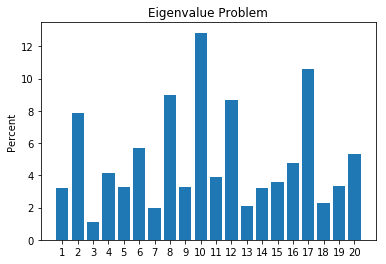

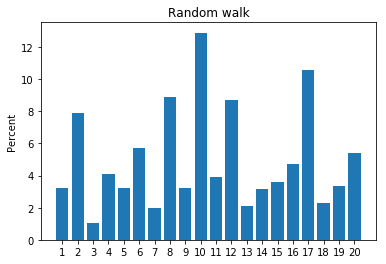

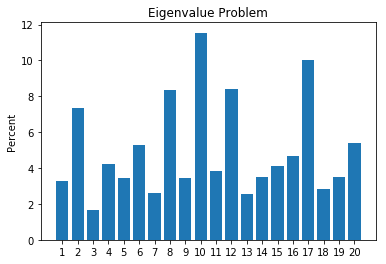

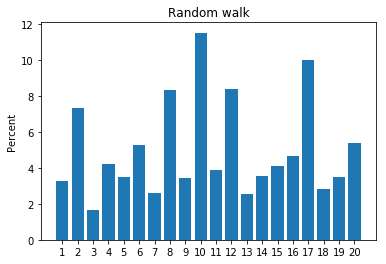

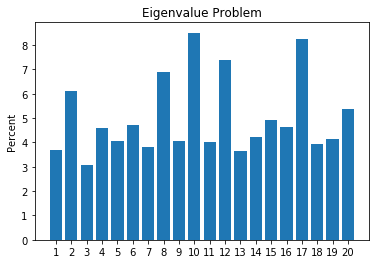

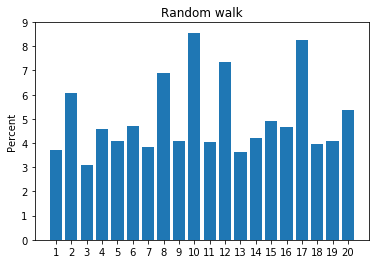

In [19]:
print(0,99, plot_bar4(B,0.99), 0,99, plot_bar(B, 1000000, 0.99))
print(0.85, plot_bar4(B,0.85), 0,85, plot_bar(B, 1000000, 0.85))
print(0,50, plot_bar4(B,0.50), 0,50, plot_bar(B, 1000000, 0.50))

Proberen jullie de grafiekjes te vergelijken? Wederom houd er even rekening mee dat elke keer dat je het programma runt de grafiekjes veranderen omdat de initiele matrix B opnieuw random word gegenereert.
Overigens denk ik vrij zeker te weten dat de meeste code wel klopt, anders zouden de Random Walk en de Eigen Value Problem niet zo verdomd veel op elkaar lijken voor elke p.

# 5 Increasing the pagerank

In [20]:
# elke keer veranderen naar de eerstvolgende grootste ranked page die nog niet klaar staat

A = [[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
 [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]]
B = [[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1],
 [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0]]

In [21]:
def add_a_link_ev(A: List[list], site: int) -> List[int]:
    """add a link to your site to a another site, it returns a list with the site of wich you added a link
    and the ranking of your site when you added that link"""
    b = [] 
    for i in range(len(A)):
        c = A[i][site]  ##so the original value got saved
        A[i][site] = 1  ##changing one value
        b.append([i + 1, Ak_e(A, 0.85)[site]*100])
        A[i][site] = c  ##the value got replaced with the original
    return b
    
def remove_a_link_ev(A: List[list], site: int) -> List[int]:
    """remove a link to your site to a another site, it returns a list with the site of wich you removed a link
    and the ranking of your site when you removed that link (when there wasn't a link nothing changes)"""
    b = []
    for i in range(len(A)):
        c = A[i][site]  ##so the original value got saved
        A[i][site] = 0  ##changing one value
        b.append([i+1,Ak_e(A, 0.85)[site]*100])
        A[i][site] = c  ##the value got replaced with the original
    return b

def get_a_link_ev(A: List[list], site: int) -> List[int]:
    """another site adds an link to your site, it returns a list with the site of wich you got a link
    and the ranking of your site when you added that link"""
    b = []
    for i in range(len(A)):    
        c = A[site][i]  ##so the original value got saved
        A[site][i] = 1  ##changing one value
        b.append([i+1,Ak_e(A, 0.85)[site]*100])
        A[site][i] = c  ##the value got replaced with the original
    return b

def got_a_friend(A: List[list], site1: int, site2: int) -> List[int]:
    """two sites, site1 and site2 refer to eachother repeat times, it returns the ranking of site1 and site2 
    after refering to eachother. !!!DON'T THINK THIS IS THE RIGHT WAY TO DO IT!!!!"""
    c = A[site1][site2]  ##so the original value got saved
    d = A[site2][site1]  ##so the original value got saved
    A[site1][site2] = 1  ##changing one value
    A[site2][site1] = 1  ##changing one value
    b = [Ak_e(A, 0.85)[site1], Ak_e(A, 0.85)[site2]]
    print(Ak_e(A, 0.84))
    A[site1][site2] = c  ##the value got replaced with the original
    A[site2][site1] = d  ##the value got replaced with the original
    return b

Antwoorden als je er vanuit gaat dat rijen de referentie van r_i naar c_i is

Pagerank van 1 schiet omhoog zodra je de hoogste value toevoegt
Pagerank van 1 gaat niet omhoog zodra je de laagste value weghaalt
Pagerank van 1 gaat niet omhoog als een redelijke site hem toevoegt

0.85 <Container object of 20 artists> 0 85 <Container object of 20 artists>


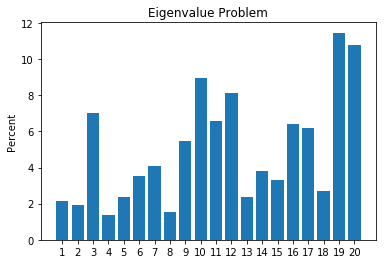

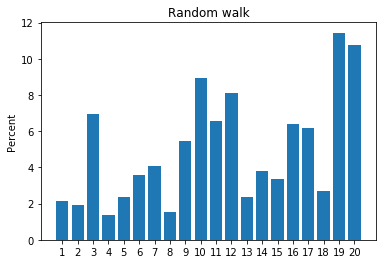

In [22]:
print(0.85, plot_bar4(A,0.85), 0,85, plot_bar(A, 1000000, 0.85))

In [23]:
add_a_link_ev(A, 0)

[[1, 2.554809898581268],
 [2, 2.122948697694928],
 [3, 2.1178552037701315],
 [4, 2.1103419368237017],
 [5, 2.120860218035663],
 [6, 2.175369600273959],
 [7, 2.115858544542441],
 [8, 2.1174102181438266],
 [9, 2.1701048169211297],
 [10, 2.126431776849802],
 [11, 2.14109222752156],
 [12, 2.1284299303956535],
 [13, 2.112547229748506],
 [14, 2.113256426863979],
 [15, 2.1228268306725195],
 [16, 2.126431776849802],
 [17, 2.126431776849802],
 [18, 2.123522775911515],
 [19, 2.126431776849802],
 [20, 2.1158585445424407]]

In [24]:
got_a_friend(A, 0,1)

[0.025414913305141694, 0.023483732337961014, 0.06881874693581318, 0.0139084222480703, 0.0240317363014153, 0.03516918004751308, 0.04079062270352973, 0.015561224024243958, 0.05400874302976481, 0.08803679061674707, 0.06468852392339723, 0.08010019216339447, 0.0240317363014153, 0.03817080071825409, 0.03312996712780042, 0.06302624189661403, 0.061240601414879324, 0.027196625634293377, 0.11271396723713886, 0.1064772320326128]


[0.02509521638481383, 0.023204089371902045]

In [25]:
%who

A	 A_to_the_power_of	 Ak_e	 B	 Gk_e	 List	 add_a_link_ev	 all_ref	 chance_matrix	 
get_a_link_ev	 got_a_friend	 internet	 links_of_site	 np	 plot_bar	 plot_bar4	 plt	 probability	 
random	 random_link	 random_site	 ref	 remove_a_link_ev	 square_matrix_multiplication	 standard_base_vector	 steps_between_sites	 zero_matrix	 

